In [416]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})

# Load data

In [417]:
data_path = Path('data_files/')
filename = {
    'train_input'  : 'input_training_imet9ZU.csv',
    'train_output' : 'output_training_yCN1f2d.csv',
    'test_input'   : 'input_test_4AhEauI.csv' 
}
# Check if all needed files exit
assert all( (data_path/fn).exists() for fn in filename.values() )

### Train data

In [418]:
train_input = pd.read_csv(data_path/filename['train_input'])
display(train_input.head())
print(f'train_input shape : {train_input.shape}')

,ID,dt_close,product_id,liquidity_rank,normal_trading_day,dt_expiry,open,high,low,close,open_interest,volume,tick_size,fixed
0,0,8862,401920,0,1,8952,2710.0,2721.0,2624.0,2635.0,2814,402,11,0
1,1,8862,401920,1,1,8995,2610.0,2638.0,2547.0,2560.0,905,107,11,0
2,2,8862,401920,2,1,9039,2530.0,2550.0,2468.0,2478.0,719,41,11,0
3,3,8862,401920,3,1,9104,2497.0,2508.0,2437.0,2443.0,466,25,11,0
4,4,8862,401920,4,1,9213,2474.0,2505.0,2443.0,2452.0,286,11,11,0


train_input shape : (629611, 14)


### Train outputs

In [419]:
train_output = pd.read_csv(data_path/filename['train_output'])
display(train_output.head())
print(f'train_output shape : {train_output.shape}')

,ID,spread
0,0,2.552161
1,1,3.575163
2,2,5.351175
3,3,5.285281
4,4,9.712062


train_output shape : (629611, 2)


### Test data

In [420]:
test_input = pd.read_csv(data_path/filename['test_input'])
display(test_input.head())
print(f'test_input shape : {test_input.shape}')

,ID,dt_close,product_id,liquidity_rank,normal_trading_day,dt_expiry,open,high,low,close,open_interest,volume,tick_size,fixed
0,1977,8868,102103552,0,1,8879,9299.0,9461.0,9087.000,9407.0,2844,3033,11,0
1,1978,8868,102103552,1,1,8901,9279.0,9442.0,9075.999,9391.0,2344,844,11,0
2,1979,8868,102103552,2,1,8924,9196.0,9420.0,9068.000,9374.0,757,358,11,0
3,1980,8868,102103552,3,1,8946,9174.0,9391.0,9050.000,9359.0,655,293,11,0
4,1981,8868,102103552,4,1,8966,9153.0,9372.0,9042.000,9346.0,314,138,11,0


test_input shape : (230304, 14)


### Merge in one df 

In [421]:
df = pd.concat( [train_input.merge(train_output, on='ID'), test_input])
df = df.sort_values('ID', ignore_index=True)
df

,ID,dt_close,product_id,liquidity_rank,normal_trading_day,dt_expiry,open,high,low,close,open_interest,volume,tick_size,fixed,spread
0,0,8862,401920,0,1,8952,2710.0,2721.0,2624.0,2635.0,2814,402,11,0,2.552161
1,1,8862,401920,1,1,8995,2610.0,2638.0,2547.0,2560.0,905,107,11,0,3.575163
2,2,8862,401920,2,1,9039,2530.0,2550.0,2468.0,2478.0,719,41,11,0,5.351175
3,3,8862,401920,3,1,9104,2497.0,2508.0,2437.0,2443.0,466,25,11,0,5.285281
4,4,8862,401920,4,1,9213,2474.0,2505.0,2443.0,2452.0,286,11,11,0,9.712062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859910,859910,11452,198575104,4,1,11770,19763.0,19768.0,19754.0,19754.0,779,147,10,0,1.053297
859911,859911,11452,198575104,5,1,11830,19719.0,19728.0,19712.0,19712.0,705,202,10,0,1.106193
859912,859912,11452,198575104,6,1,11900,19689.0,19698.0,19681.0,19681.0,351,63,10,0,1.254185
859913,859913,11452,198720000,0,1,11503,4094.0,4113.0,4036.0,4078.0,239342,57749,15,0,1.043020


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859915 entries, 0 to 859914
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  859915 non-null  int64  
 1   dt_close            859915 non-null  int64  
 2   product_id          859915 non-null  int64  
 3   liquidity_rank      859915 non-null  int64  
 4   normal_trading_day  859915 non-null  int64  
 5   dt_expiry           859915 non-null  int64  
 6   open                859915 non-null  float64
 7   high                859915 non-null  float64
 8   low                 859915 non-null  float64
 9   close               859915 non-null  float64
 10  open_interest       859915 non-null  int64  
 11  volume              859915 non-null  int64  
 12  tick_size           859915 non-null  int64  
 13  fixed               859915 non-null  int64  
 14  spread              629611 non-null  float64
dtypes: float64(5), int64(10)
memory us

# Stats

### Missing values by product

Number of different products : 104


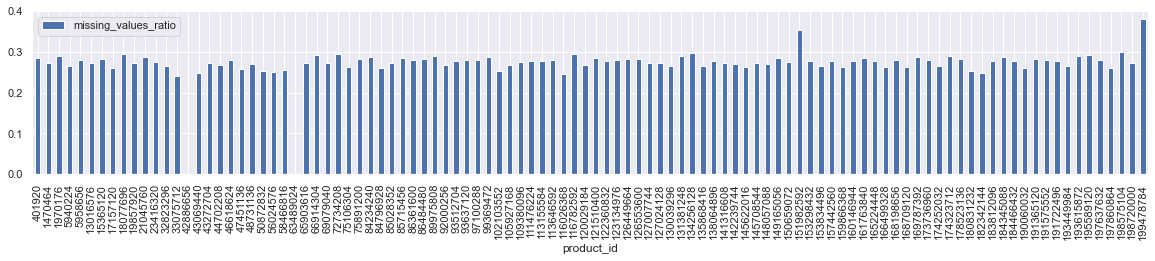

In [423]:
# Sorted ratios of missing values for each product_id
product_id_group = df.groupby(['product_id'])
print(f'Number of different products : {len(product_id_group)}')
ax = (
    product_id_group
    .agg({'spread': lambda x: x.isnull().mean()})
    .rename(columns={'spread':'missing_values_ratio'})
    .plot(kind='bar', figsize=(20,3))
)

### Missing values by closing date

Number of close dates : 2585 days


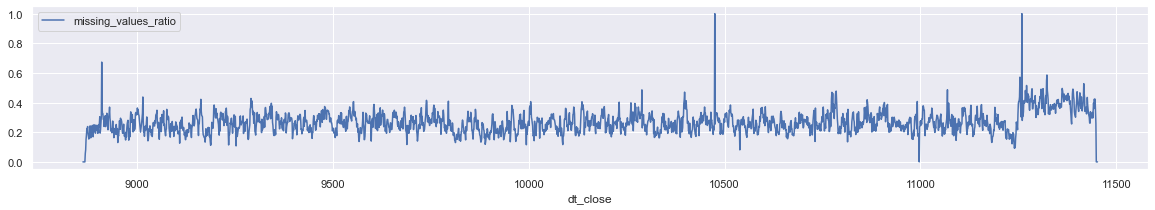

In [424]:
# Sorted ratios of missing values for each dt_close
dt_close_group = df.groupby(['dt_close'])
print(f'Number of close dates : {len(dt_close_group)} days')
ax = (
    dt_close_group
    .agg({'spread': lambda x: x.isnull().mean()})
    .rename(columns={'spread':'missing_values_ratio'})
    .plot(figsize=(20,3))
)

# "Futures" spread evolution

In [425]:
# Check that : For some product_id, all futures contracts have different expiry dates 
# a = df.groupby(['product_id','dt_close']).agg({'liquidity_rank':'nunique', 'dt_expiry':'nunique'})
# (a['liquidity_rank']==a['dt_expiry']).mean() #must return 1

In [426]:
# Dictionnary matching product_id to the list of expiry dates
product_id_to_dt_expiry = df.groupby(['product_id'])['dt_expiry'].unique().to_dict()
product_ids = list(product_id_to_dt_expiry.keys())

### Plotting spread evolution for each futures contract 

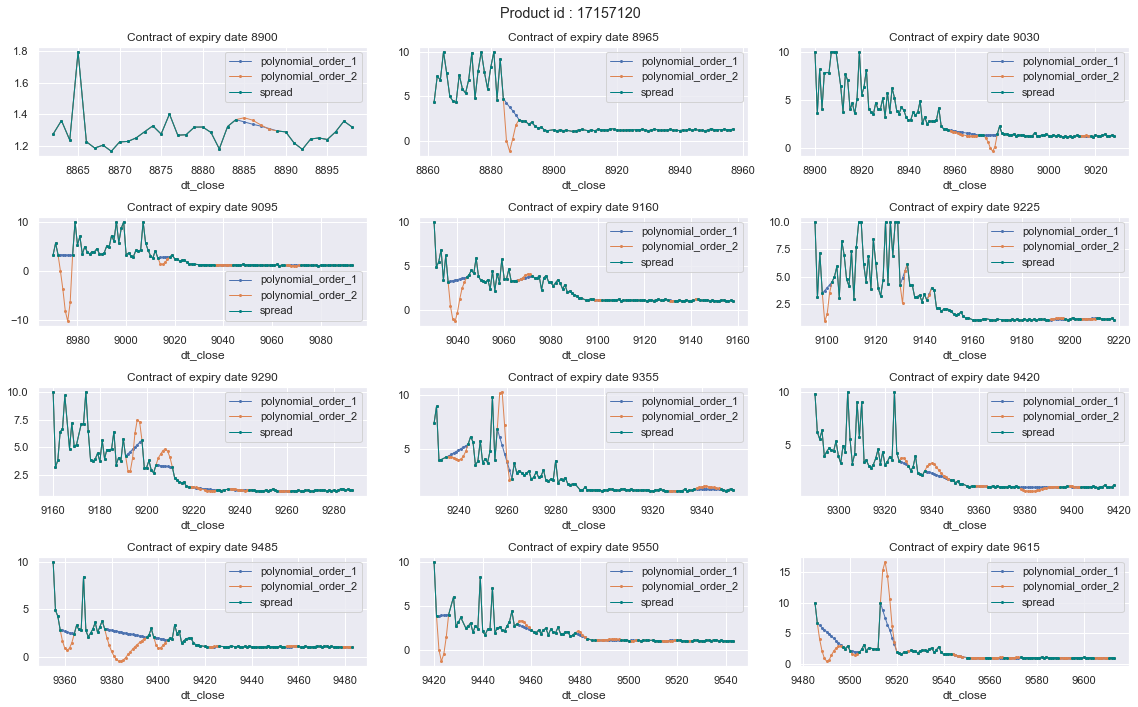

In [427]:
N,M = 4,3
fig, axs = plt.subplots(N, M, figsize=(16,10))

# Product id
product_id = product_ids[7]
fig.suptitle(f'Product id : {product_id}')

# List of futures contracts (dt_expiry)
dt_expiry_list = product_id_to_dt_expiry[product_id][:N*M]
# dt_expiry_list = np.sort(np.random.choice( a = product_id_to_dt_expiry[product_id], size = min(N*M, len(product_id_to_dt_expiry[product_id])), replace = False ))


# Plot Spread evolution for each contract
for i,dt_expiry in enumerate(dt_expiry_list):
    # Select some specific contract 
    df_futures_contract = df[ (df['product_id']==product_id) & (df['dt_expiry'] ==dt_expiry) ].sort_values('dt_close')
    
    # Interpolate spread missing values using different orders
    for order in range(1,3):
        df_futures_contract[f"polynomial_order_{order}"] = df_futures_contract['spread'].interpolate(method='polynomial', order=order)
        df_futures_contract.plot(x='dt_close', y=f'polynomial_order_{order}', marker='.', ax= axs[i//M, i%M], linewidth=1, markersize=4)
    
    # Plot original spread
    df_futures_contract.plot(x='dt_close', y='spread', marker='.', color='teal', ax= axs[i//M, i%M], linewidth=1, markersize=4)
    axs[i//M, i%M].set_title(f"Contract of expiry date {dt_expiry}")

    
fig.tight_layout()


### Plotting futures spread (for some particular product_id and different expiry dates)
* Futures contracts share similar trends 
* Spread values are missing for the same close dates

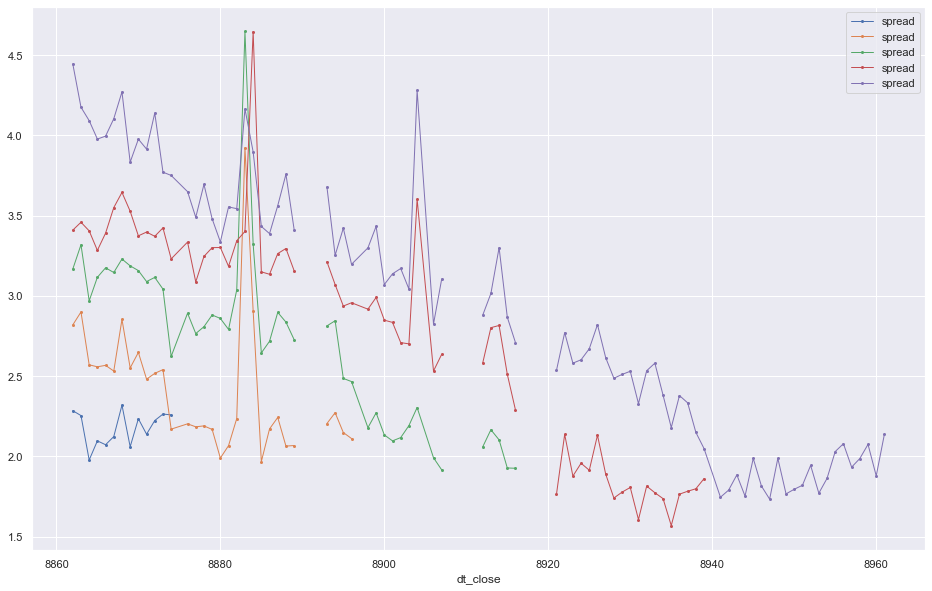

In [428]:
fig, ax = plt.subplots(figsize=(16, 10))

N_contracts = 5

# Product id
product_id = product_ids[2]

# List of futures contracts (dt_expiry)
dt_expiry_list = product_id_to_dt_expiry[product_id][:N_contracts]


# Plot Spread evolution for each contract
for i,dt_expiry in enumerate(dt_expiry_list):
    # Select some specific contract 
    df_futures_contract = df[ (df['product_id']==product_id) & (df['dt_expiry'] ==dt_expiry) ].sort_values('dt_close')
    # Plot original spread
    df_futures_contract.plot(x='dt_close', y='spread', marker='.', linewidth=1, markersize=4, ax=ax)

### Plotting contracts spread relatively to days left to expiry

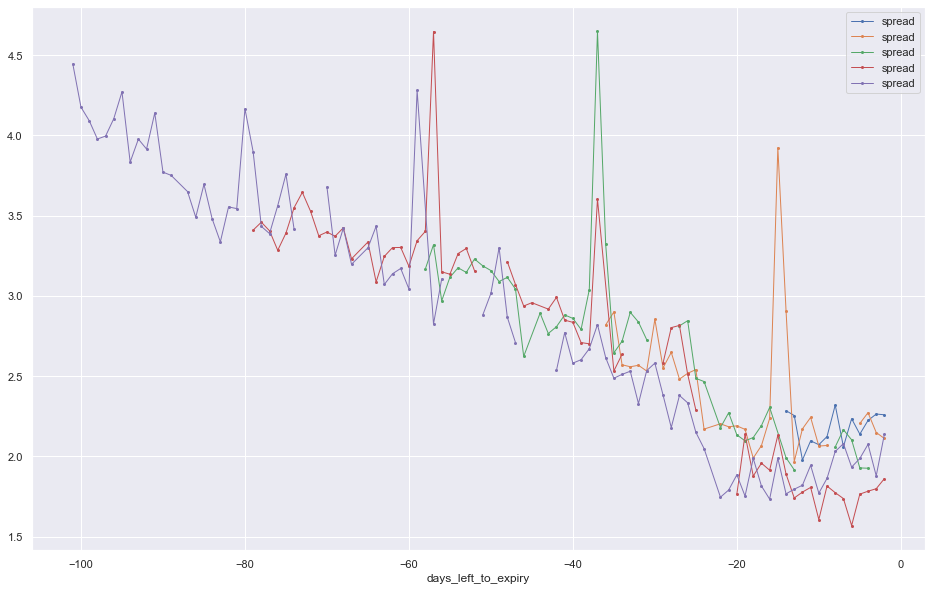

In [429]:
fig, ax = plt.subplots(figsize=(16, 10))

N_contracts = 5

# Product id
product_id = product_ids[2]

# List of futures contracts (dt_expiry)
dt_expiry_list = product_id_to_dt_expiry[product_id][:N_contracts]


# Plot Spread evolution for each contract
for i,dt_expiry in enumerate(dt_expiry_list):
    # Select some specific contract 
    df_futures_contract = df[ (df['product_id']==product_id) & (df['dt_expiry'] ==dt_expiry) ].sort_values('dt_close')
    df_futures_contract['days_left_to_expiry'] = df_futures_contract['dt_close'] - df_futures_contract['dt_expiry']
    # Plot original spread
    df_futures_contract.plot(x='days_left_to_expiry', y='spread', marker='.', linewidth=1, markersize=4, ax=ax)

In [ ]:
futures_spread_evol = df.groupby(['product_id','dt_expiry']).agg({'dt_close':list, 'spread':list})
futures_spread_evol